## NEURAL NETWORKS : NON LINEAR ACTIVATION FUNCTIONS 

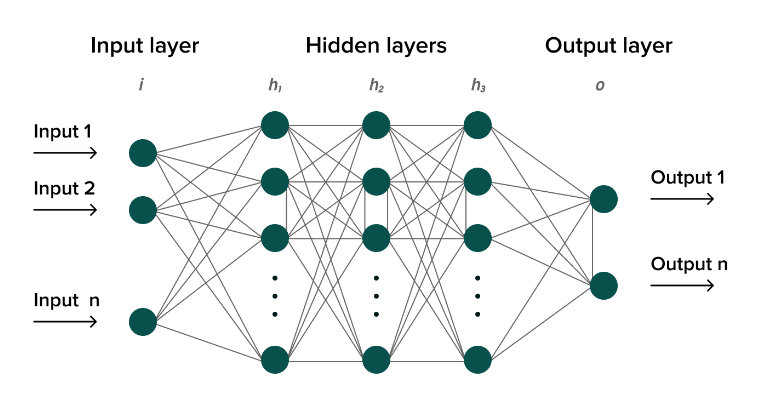

### HEMANT THAPA

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Loading Dataset

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

In [2]:
df = pd.read_csv('Folds5x2_pp.csv')

In [3]:
df[:5]

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

In [4]:
df['average_temperature'] = df['AT']
df['exhaust_vacuum'] = df['V']
df['ambient_pressure'] = df['AP']
df['relative_humidity'] = df['RH']
df['net_hourly_electrical_energy_output'] = df['PE']

In [5]:
columns_to_drop = ['AT', 'V', 'AP', 'RH', 'PE']
df = df.drop(columns=columns_to_drop)

In [6]:
df[:5]

,average_temperature,exhaust_vacuum,ambient_pressure,relative_humidity,net_hourly_electrical_energy_output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


#### Pre Processing 

In [7]:
df.shape

(9568, 5)

In [8]:
df.dtypes

average_temperature                    float64
exhaust_vacuum                         float64
ambient_pressure                       float64
relative_humidity                      float64
net_hourly_electrical_energy_output    float64
dtype: object

In [9]:
df.isnull().sum()

average_temperature                    0
exhaust_vacuum                         0
ambient_pressure                       0
relative_humidity                      0
net_hourly_electrical_energy_output    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   average_temperature                  9568 non-null   float64
 1   exhaust_vacuum                       9568 non-null   float64
 2   ambient_pressure                     9568 non-null   float64
 3   relative_humidity                    9568 non-null   float64
 4   net_hourly_electrical_energy_output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### Exploratory Data Analysis (EDA)

In [11]:
df.columns

Index(['average_temperature', 'exhaust_vacuum', 'ambient_pressure',
       'relative_humidity', 'net_hourly_electrical_energy_output'],
      dtype='object')

In [12]:
df.corr()

,average_temperature,exhaust_vacuum,ambient_pressure,relative_humidity,net_hourly_electrical_energy_output
average_temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
ambient_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
relative_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
net_hourly_electrical_energy_output,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [13]:
df.describe()

,average_temperature,exhaust_vacuum,ambient_pressure,relative_humidity,net_hourly_electrical_energy_output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [14]:
def plot_all_distributions(dataframe, figsize=(10, 10), bins=40):
    num_cols = dataframe.shape[1]
    #the number of rows needed based on the number of columns
    num_rows = (num_cols + 1) // 2
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=figsize, sharey=True)
    #flatten axes if there's only one row
    if num_rows == 1:
        axes = [axes]
    #list of colors for each column
    colors = ['skyblue', 'salmon', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i, (column, color) in enumerate(zip(dataframe.columns, colors)):
        row, col = divmod(i, 2)
        sns.histplot(dataframe[column], kde=True, bins=bins, ax=axes[row][col], label=column, color=color)
        axes[row][col].legend()
        axes[row][col].grid(True, ls='--', color='grey', alpha=0.5)
    #remove empty subplots if the number of columns is odd
    if num_cols % 2 != 0:
        fig.delaxes(axes[-1][-1])
    plt.tight_layout()
    plt.show()

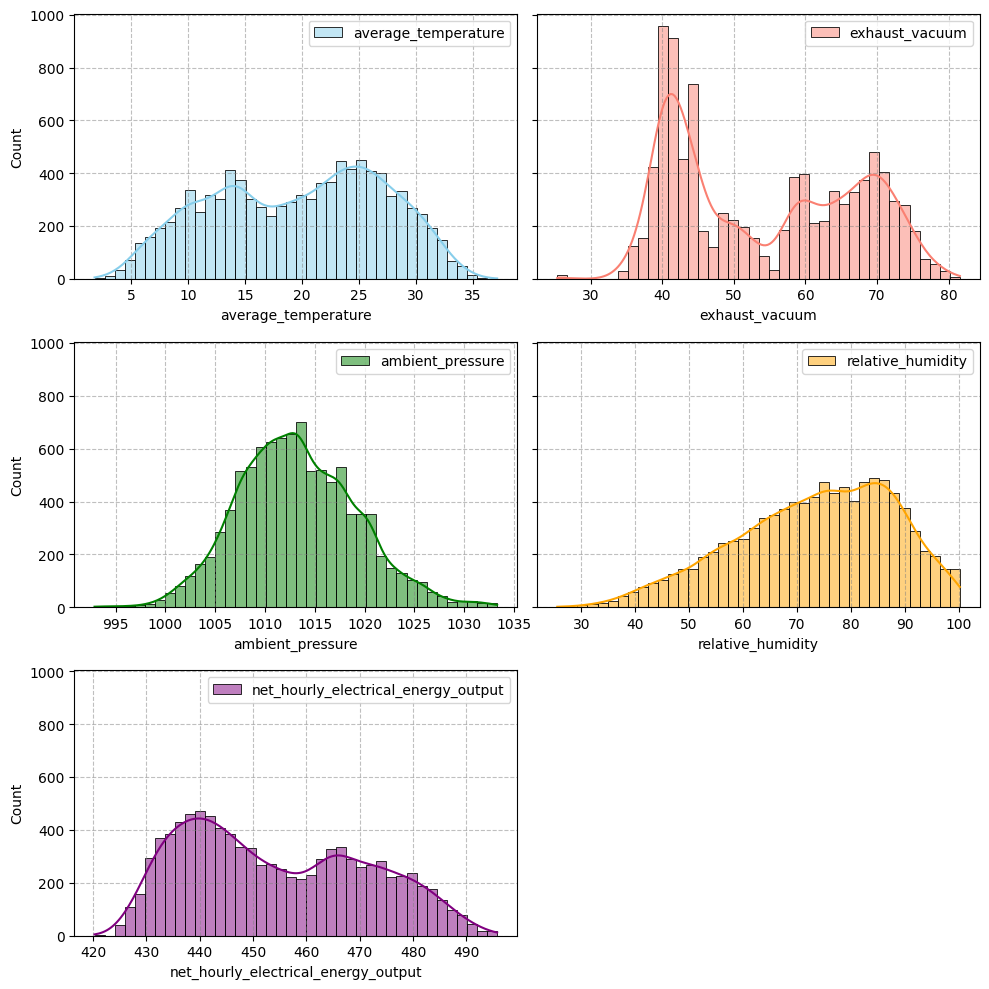

In [15]:
plot_all_distributions(df)

#### Data Scaling 

In [16]:
df = (df - df.mean())/df.std()
df[:5]

,average_temperature,exhaust_vacuum,ambient_pressure,relative_humidity,net_hourly_electrical_energy_output
0,-1.517782,-1.065149,-0.407336,1.143885,1.530146
1,0.535228,0.329260,-0.313040,0.061028,-0.504776
2,1.353748,0.204141,-1.028675,-2.150575,-0.914338
3,-0.077992,-0.363223,-1.016888,0.238422,-0.074706
4,-1.053507,-1.073805,0.651804,1.636341,0.589734


#### Feature Selection 

In [17]:
#Features
X = df['average_temperature'].values.reshape(-1, 1)  

In [18]:
#Target variable
y = df['exhaust_vacuum'].values  

#### Splitting data into Train and Test set

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.callbacks import LambdaCallback
from keras.regularizers import l2
from sklearn.metrics import r2_score, mean_squared_error

#### Activation Functions

In [22]:
#print_completed_epoch function
def print_completed_epoch(epoch, logs):
    print(f"Epoch {epoch + 1} completed for activation function: {logs['activation_function']}")

In [23]:
#activation functions
activation_functions = ['relu', 'sigmoid', 'tanh', 'softplus']

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 0.3261
Epoch 2/50
240/240 [==============================] - 0s 1ms/step - loss: 0.3155 - val_loss: 0.3063
Epoch 3/50
240/240 [==============================] - 0s 1ms/step - loss: 0.3054 - val_loss: 0.2994
Epoch 4/50
240/240 [==============================] - 0s 1ms/step - loss: 0.3002 - val_loss: 0.2946
Epoch 5/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2966 - val_loss: 0.2911
Epoch 6/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2934 - val_loss: 0.2883
Epoch 7/50
240/240 [==============================] - 1s 2ms/step - loss: 0.2914 - val_loss: 0.2859
Epoch 8/50
240/240 [==============================] - 1s 2ms/step - loss: 0.2898 - val_loss: 0.2841
Epoch 9/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2886 - val_loss: 0.2828
Epoch 10/50
240/240 [==============================] - 1s 2ms/step - loss: 0.2880 - val_loss: 0.2819

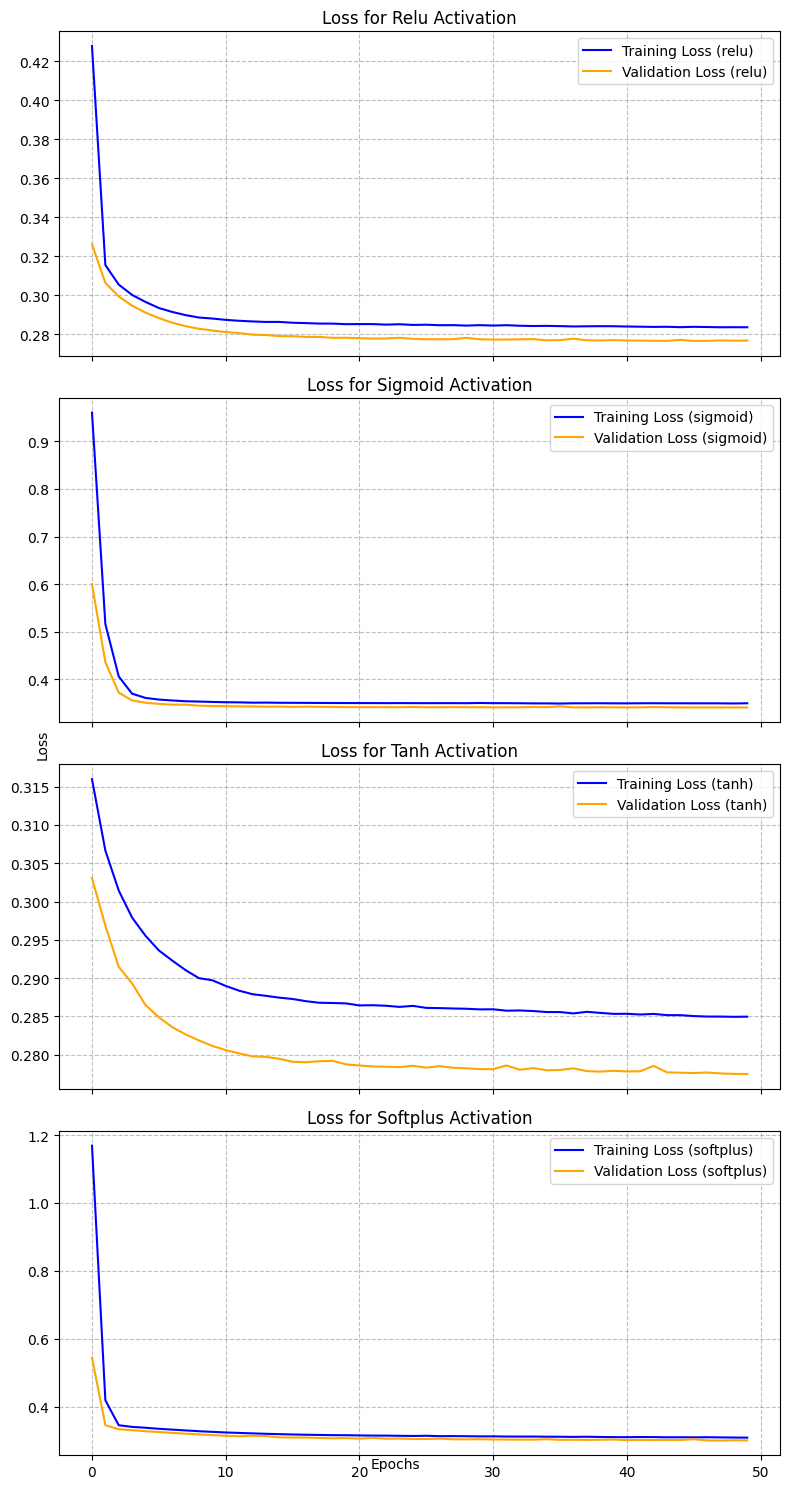

In [24]:
fig, axes = plt.subplots(nrows=len(activation_functions), ncols=1, figsize=(8, 15), sharex=True)

#iterate over activation functions
for i, activation_function in enumerate(activation_functions):
    #simple feed-forward neural network model with L2 regularization
    model = Sequential()
    #L2 regularization on the first layer
    model.add(Dense(units=10, input_dim=1, activation=activation_function, kernel_regularizer=l2(0.01)))  
    #L2 regularization on the output layer
    model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))  
    #compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    #custom callback to print completed epochs
    epoch_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: print_completed_epoch(epoch, {'activation_function': activation_function}))
    #train the model with the custom callback
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[epoch_callback])
    print()
    print("Completed")
    print()
    #training loss on the ith subplot
    axes[i].plot(history.history['loss'], label=f'Training Loss ({activation_function})', color='blue')
    #validation loss on the ith subplot
    axes[i].plot(history.history['val_loss'], label=f'Validation Loss ({activation_function})', color='orange')
    axes[i].set_title(f'Loss for {activation_function.capitalize()} Activation')
    axes[i].grid(True, ls='--', color='grey', alpha=0.5)
    axes[i].legend()

#X and Y labels
fig.text(0.5, 0.02, 'Epochs', ha='center', va='center')
fig.text(0.06, 0.5, 'Loss', ha='center', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

A feed-forward neural network for regression is implemented using Keras. The main focus is on exploring the impact of various activation functions in the hidden layer.

#### Input Layer
```python
model.add(Dense(units=10, input_dim=1, activation=activation_function, kernel_regularizer=l2(0.01)))
```
- One input feature (input_dim=1)

- First hidden layer with 10 neurons (units=10)

Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model learns the training data too well but struggles to generalize to new, unseen data. One common regularization method is L2 regularization (or weight decay).

##### L2 Regularization

L2 regularization introduces a penalty term based on the squared magnitude of the model weights to the loss function. The goal is to discourage the weights from becoming too large. The L2 regularization term is defined as:

$$ L2_{\text{Regularization}} = \frac{\lambda}{2} \sum_{i} w_i^2 $$

- $ \lambda $ (lambda) is the regularization parameter, controlling the strength of the regularization.
- $ w_i $ represents each individual weight in the model.

The regularized loss function is then defined as:

$ \text{Loss}_{\text{Regularized}} = \text{Loss}_{\text{Original}} + L2_{\text{Regularization}} $

1. **Original Loss ($ \text{Loss}_{\text{Original}} $):**
   - The loss function measuring the difference between the model's predictions and the actual target values.

2. **Regularization Term ($ L2_{\text{Regularization}} $):**
   - The penalty term based on the squared magnitudes of the weights.

3. **Regularized Loss ($ \text{Loss}_{\text{Regularized}} $):**
   - The sum of the original loss and the regularization term.


```python
model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))
```

- Dense(units=1): This specifies that the output layer has one neuron, which is common for regression tasks where you are predicting a continuous value.
- activation='linear': The linear activation function is used in the output layer for regression tasks. This means that the output of the neuron is directly proportional to the weighted sum of its inputs, without any non-linear activation applied.
- kernel_regularizer=l2(0.01): L2 regularization is applied to the weights of the output layer to prevent overfitting.

```python
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0

```

- Optimizer: The choice of optimizer determines how the neural network weights are updated during training. In this case, 'adam' is used, which is a popular optimization algorithm that adapts the learning rates of each parameter.
- Loss Function: The loss function (or objective function) measures how well the model is performing. For regression tasks, mean squared error ('mean_squared_error') is a common choice. It calculates the average squared difference between the predicted and actual values. The goal during training is to minimize this loss.

- Training Data: The X_train and y_train datasets are used for training the neural network. X_train contains the input features, and y_train contains the corresponding target values.
- Epochs: An epoch is one complete pass through the entire training dataset. The model is trained for 100 epochs, meaning it goes through the entire dataset 100 times.
- Batch Size: The batch size is the number of training examples utilised in one iteration. Here, it's set to 32, meaning the model updates its weights after processing each batch of 32 training examples.
- Verbose: The verbose parameter controls the amount of information displayed during training. In this case, verbose=0 means no output is displayed during training.

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 0.5454
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 0.3054
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2996
Epoch 4/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2961
Epoch 5/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2928
Epoch 6/50
240/240 [==============================] - 0s 1ms/step - loss: 0.2903
Epoch 7/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2886
Epoch 8/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2877
Epoch 9/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2869
Epoch 10/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2862
Epoch 11/50
240/240 [==============================] - 0s 1ms/step - loss: 0.2858
Epoch 12/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 13/50
240/240 [====

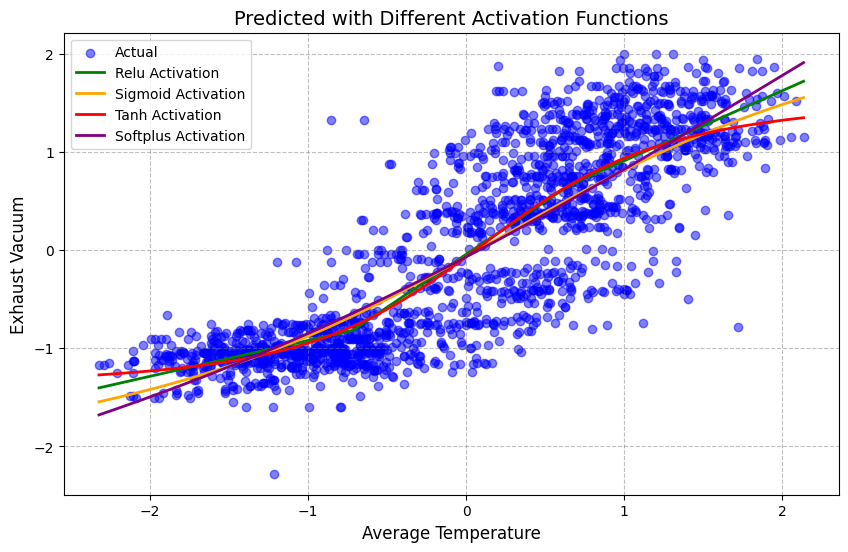

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, label='Actual', color='blue', alpha=0.5, marker='o')
for activation_function, color in zip(activation_functions, ['green', 'orange', 'red', 'purple']):
    #simple feed-forward neural network model with L2 regularization
    model = Sequential()
    model.add(Dense(units=10, input_dim=1, activation=activation_function, kernel_regularizer=l2(0.01)))
    model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))
    model.compile(optimizer='adam', loss='mean_squared_error')
    #training model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    #predictions
    y_pred = model.predict(X_test)
    #r square
    r2 = r2_score(y_test, y_pred)
    #mean square error
    mse = mean_squared_error(y_test, y_pred)
    print(f'R-squared ({activation_function.capitalize()}): {r2:.3f}')
    print(f'Mean Squared Error ({activation_function.capitalize()}): {mse:.3f}')
    sorted_indices = np.argsort(X_test[:, 0])
    plt.plot(X_test[sorted_indices], y_pred[sorted_indices], label=f'{activation_function.capitalize()} Activation', linewidth=2, color=color)
plt.xlabel('Average Temperature', fontsize=12)
plt.ylabel('Exhaust Vacuum', fontsize=12)
plt.title('Predicted with Different Activation Functions', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, ls='--', color='grey', alpha=0.5)
plt.show()

In [26]:
df[:5]

,average_temperature,exhaust_vacuum,ambient_pressure,relative_humidity,net_hourly_electrical_energy_output
0,-1.517782,-1.065149,-0.407336,1.143885,1.530146
1,0.535228,0.329260,-0.313040,0.061028,-0.504776
2,1.353748,0.204141,-1.028675,-2.150575,-0.914338
3,-0.077992,-0.363223,-1.016888,0.238422,-0.074706
4,-1.053507,-1.073805,0.651804,1.636341,0.589734


#### Changing Features 

In [27]:
#Features
X = df['average_temperature'].values.reshape(-1, 1)  
#Target variable
y = df['net_hourly_electrical_energy_output'].values  

#### Splitting data into train and test set

In [28]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
#activation_functions is defined somewhere in your code
activation_functions = ['relu', 'sigmoid', 'tanh', 'softplus']
epochs_list = [10, 20, 50]
#colors for each epoch
epoch_colors = ['green', 'orange', 'red']

60/60 [==============================] - 0s 1ms/step
R-squared (Relu, Epochs=10): 0.911
Mean Squared Error (Relu, Epochs=10): 0.088
60/60 [==============================] - 0s 1ms/step
R-squared (Relu, Epochs=20): 0.912
Mean Squared Error (Relu, Epochs=20): 0.087
60/60 [==============================] - 0s 2ms/step
R-squared (Relu, Epochs=50): 0.912
Mean Squared Error (Relu, Epochs=50): 0.087
60/60 [==============================] - 0s 2ms/step
R-squared (Sigmoid, Epochs=10): 0.906
Mean Squared Error (Sigmoid, Epochs=10): 0.093
60/60 [==============================] - 0s 1ms/step
R-squared (Sigmoid, Epochs=20): 0.908
Mean Squared Error (Sigmoid, Epochs=20): 0.091
60/60 [==============================] - 0s 1ms/step
R-squared (Sigmoid, Epochs=50): 0.907
Mean Squared Error (Sigmoid, Epochs=50): 0.093
60/60 [==============================] - 0s 1ms/step
R-squared (Tanh, Epochs=10): 0.911
Mean Squared Error (Tanh, Epochs=10): 0.088
60/60 [==============================] - 0s 1ms/step
R-squ

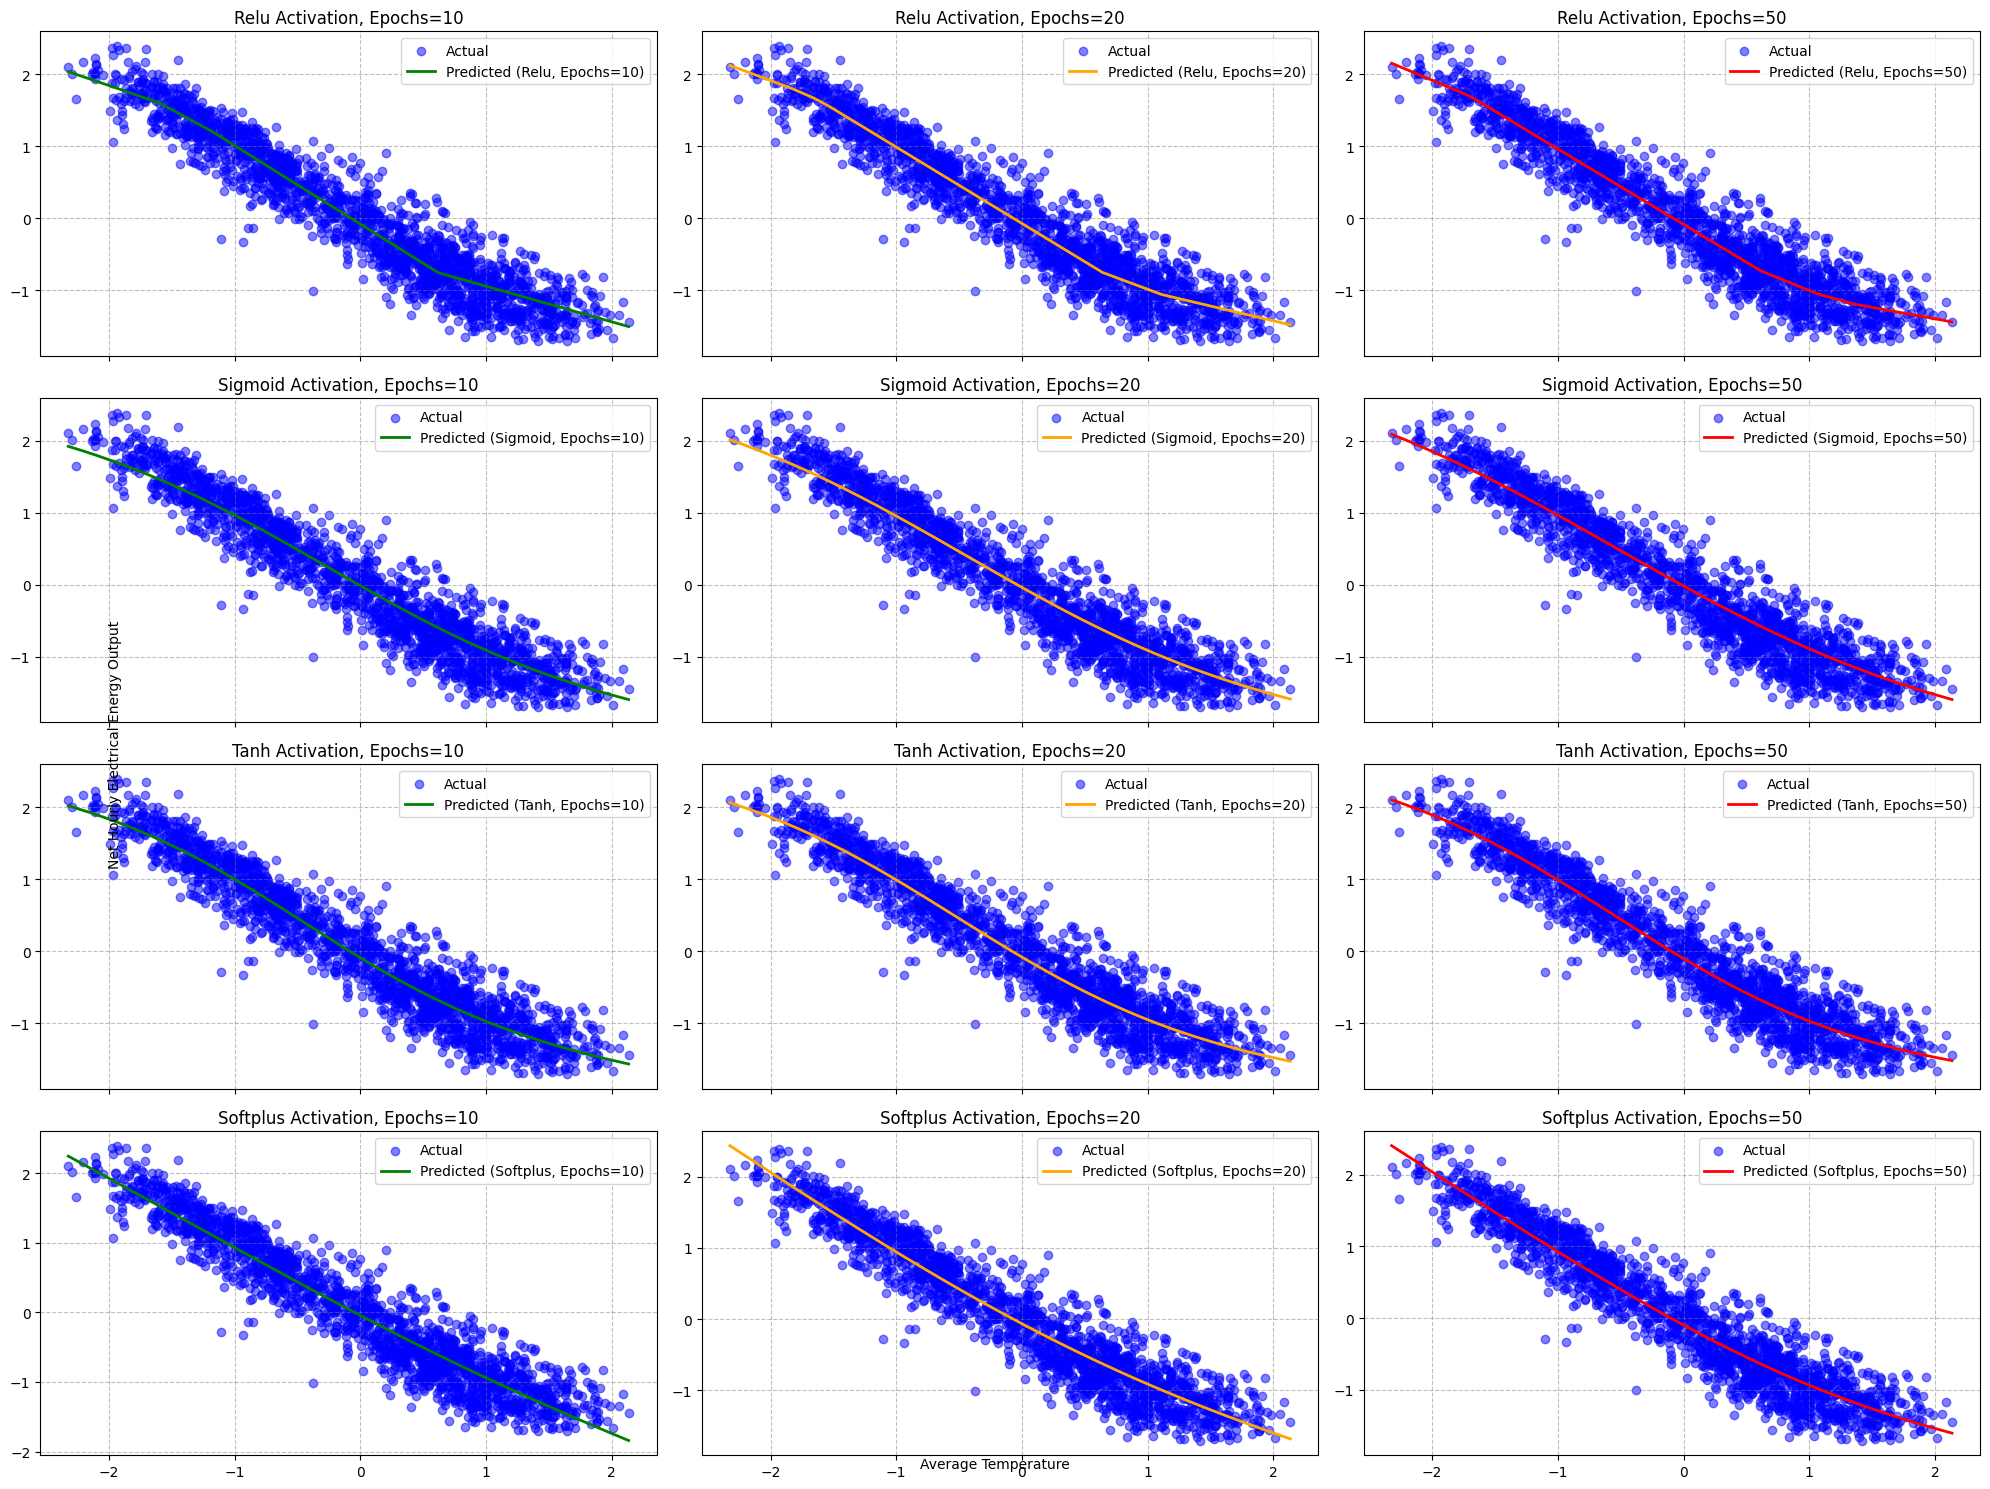

In [30]:
fig, axes = plt.subplots(nrows=len(activation_functions), ncols=len(epochs_list), figsize=(20, 15), sharex=True)
#lists to store results
results = []
#iterate over activation functions
for i, activation_function in enumerate(activation_functions):
    #iterate over epochs
    for j, epochs in enumerate(epochs_list):
        model = Sequential()
        model.add(Dense(units=10, input_dim=1, kernel_regularizer=l2(0.01)))
        model.add(Activation(activation_function))
        model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))
        model.compile(optimizer='adam', loss='mean_squared_error')
        #training model
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)
        #predictions
        y_pred = model.predict(X_test)
        #r square
        r2 = r2_score(y_test, y_pred)
        #mean square error
        mse = mean_squared_error(y_test, y_pred)
        #append results to the list
        results.append({
            'Activation Function': activation_function,
            'Epochs': epochs,
            'R-squared': r2,
            'MSE': mse
        })
        print(f'R-squared ({activation_function.capitalize()}, Epochs={epochs}): {r2:.3f}')
        print(f'Mean Squared Error ({activation_function.capitalize()}, Epochs={epochs}): {mse:.3f}')
        sorted_indices = np.argsort(X_test[:, 0])
        #predicted values on the respective subplot with different colors for each epoch
        axes[i, j].scatter(X_test, y_test, label='Actual', color='blue', alpha=0.5, marker='o')
        axes[i, j].plot(X_test[sorted_indices], y_pred[sorted_indices], label=f'Predicted ({activation_function.capitalize()}, Epochs={epochs})', linewidth=2, color=epoch_colors[j])
        axes[i, j].set_title(f'{activation_function.capitalize()} Activation, Epochs={epochs}')
        axes[i, j].legend()
#X and Y labels
fig.text(0.5, 0.02, 'Average Temperature', ha='center', va='center')
fig.text(0.06, 0.5, 'Net Hourly Electrical Energy Output', ha='center', va='center', rotation='vertical')
for ax in axes.flat:
    ax.grid(True, ls='--', color='grey', alpha=0.5)
plt.tight_layout()
plt.show()

In [31]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Epochs', ascending=False)

In [32]:
results_df

,Activation Function,Epochs,R-squared,MSE
2,relu,50,0.911828,0.087305
5,sigmoid,50,0.906522,0.092558
8,tanh,50,0.911514,0.087616
11,softplus,50,0.909091,0.090015
1,relu,20,0.912018,0.087117
4,sigmoid,20,0.907624,0.091468
7,tanh,20,0.911196,0.087931
10,softplus,20,0.907827,0.091266
0,relu,10,0.911178,0.087949
3,sigmoid,10,0.905772,0.093301


#### The table presents the performance metrics of neural network models with different activation functions and training epochs.

#### Activation Functions Comparison:

#### ReLU Activation Function:

- **50 Epochs:**
    - R-squared: 0.911828
    - MSE: 0.087305
- **20 Epochs:**
    - R-squared: 0.912018
    - MSE: 0.087117
- **10 Epochs:**
    - R-squared: 0.911178
    - MSE: 0.087949

The ReLU activation function consistently demonstrates high R-squared values, indicating a strong fit, and low MSE values, suggesting accurate predictions across different epoch settings.

#### Sigmoid Activation Function:

- **50 Epochs:**
    - R-squared: 0.906522
    - MSE: 0.092558
- **20 Epochs:**
    - R-squared: 0.907624
    - MSE: 0.091468
- **10 Epochs:**
    - R-squared: 0.905772
    - MSE: 0.093301

The Sigmoid activation function also performs well, but slightly lower than ReLU in terms of R-squared values and slightly higher in MSE.

#### Tanh Activation Function:

- **50 Epochs:**
    - R-squared: 0.911514
    - MSE: 0.087616
- **20 Epochs:**
    - R-squared: 0.911196
    - MSE: 0.087931
- **10 Epochs:**
    - R-squared: 0.911001
    - MSE: 0.088124

Similar to ReLU, the Tanh activation function demonstrates consistently high R-squared values and low MSE values.

#### Softplus Activation Function:

- **50 Epochs:**
    - R-squared: 0.909091
    - MSE: 0.090015
- **20 Epochs:**
    - R-squared: 0.907827
    - MSE: 0.091266
- **10 Epochs:**
    - R-squared: 0.905630
    - MSE: 0.093442

The Softplus activation function shows competitive performance, although slightly lower than ReLU and Tanh in terms of R-squared values.

##### Epochs Impact:

Generally, increasing the number of training epochs improves model performance. This is evident as R-squared values tend to increase, indicating better model fits, and MSE values decrease, indicating more accurate predictions.


Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 1.0521 - val_loss: 0.3312
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 0.2300 - val_loss: 0.1761
Epoch 3/50
240/240 [==============================] - 1s 2ms/step - loss: 0.1657 - val_loss: 0.1520
Epoch 4/50
240/240 [==============================] - 1s 2ms/step - loss: 0.1469 - val_loss: 0.1403
Epoch 5/50
240/240 [==============================] - 1s 2ms/step - loss: 0.1377 - val_loss: 0.1347
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 0.1331 - val_loss: 0.1317
Epoch 7/50
240/240 [==============================] - 0s 2ms/step - loss: 0.1305 - val_loss: 0.1293
Epoch 8/50
240/240 [==============================] - 1s 2ms/step - loss: 0.1282 - val_loss: 0.1273
Epoch 9/50
240/240 [==============================] - 1s 2ms/step - loss: 0.1261 - val_loss: 0.1248
Epoch 10/50
240/240 [==============================] - 0s 2ms/step - loss: 0.1239 - val_loss: 0.1228

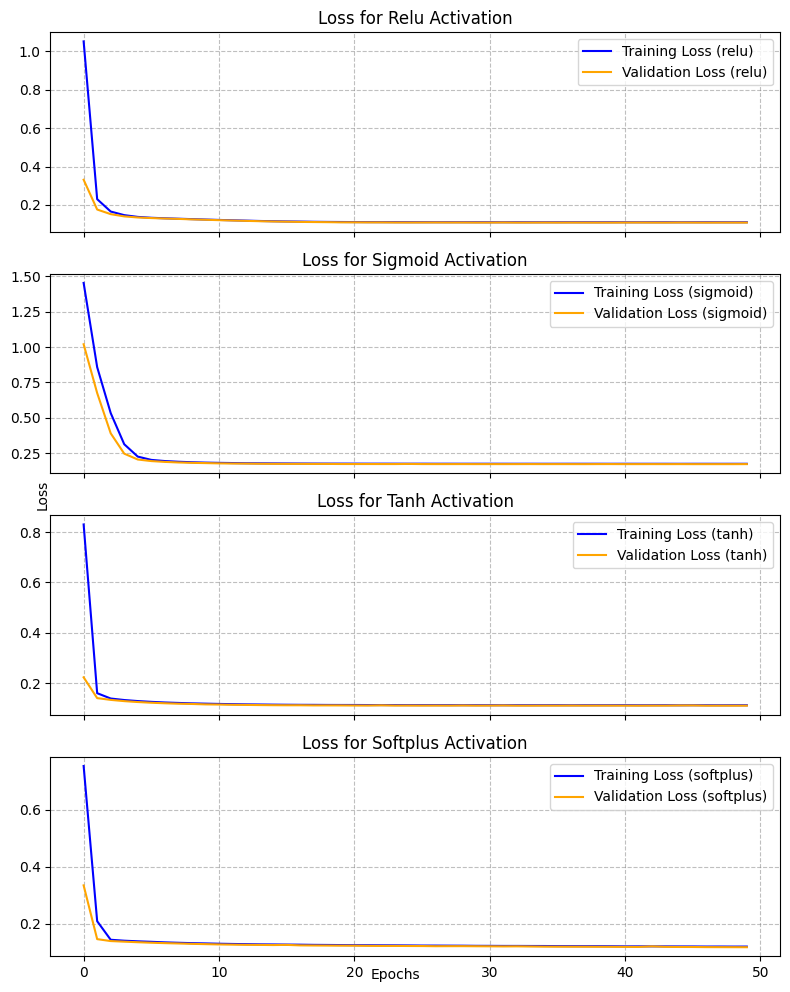

In [33]:
fig, axes = plt.subplots(nrows=len(activation_functions), ncols=1, figsize=(8, 10), sharex=True)
#iterate over activation functions
for i, activation_function in enumerate(activation_functions):
    #simple feed-forward neural network model with L2 regularization
    model = Sequential()
    #L2 regularization on the first layer
    model.add(Dense(units=10, input_dim=1, activation=activation_function, kernel_regularizer=l2(0.01)))  
    #L2 regularization on the output layer
    model.add(Dense(units=1, activation='linear', kernel_regularizer=l2(0.01)))  
    #compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    epoch_callback = LambdaCallback(on_epoch_end=lambda epoch, logs: print_completed_epoch(epoch, {'activation_function': activation_function}))
    #train the model with the custom callback
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test), callbacks=[epoch_callback])
    print()
    print("Completed")
    print()
    
    #plot training loss on the ith subplot
    axes[i].plot(history.history['loss'], label=f'Training Loss ({activation_function})', color='blue')
    #plot validation loss on the ith subplot
    axes[i].plot(history.history['val_loss'], label=f'Validation Loss ({activation_function})', color='orange')
    axes[i].set_title(f'Loss for {activation_function.capitalize()} Activation')
    axes[i].grid(True, ls='--', color='grey', alpha=0.5)
    axes[i].legend()
fig.text(0.5, 0.02, 'Epochs', ha='center', va='center')
fig.text(0.06, 0.5, 'Loss', ha='center', va='center', rotation='vertical')
plt.tight_layout()
plt.show()

#### References:



1. **Keras Examples:**
   - Official Keras Examples: [Keras Examples](https://keras.io/examples/)
   - *Keras* is a deep learning API written in Python, running on top of the machine learning platform TensorFlow.

2. **TensorFlow GitHub Repository:**
   - TensorFlow GitHub Repository: [TensorFlow GitHub](https://github.com/tensorflow/tensorflow)

3. **TensorFlow API Documentation:**
   - TensorFlow Python API Documentation: [TensorFlow API Docs](https://www.tensorflow.org/api_docs/python/tf/all_symbols)